In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [3]:
# Read in adjusted bed geometry 

bed_adjusted = nc.Dataset('DerwaelBCsGauss15.nc')
X = np.array(bed_adjusted.variables['x'][:])
Y = np.array(bed_adjusted.variables['y'][:])
bed_adjusted = np.array(bed_adjusted.variables['bedrock'][:])



In [4]:
# Read in original bed geometry

bed_original = nc.Dataset('Derwael_base2.nc')
bed_original = np.array(bed_original.variables['bedrock'][:])


In [5]:
# Read in grounding line

dfGL = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/GroundingLine.csv")

points = np.column_stack((list(dfGL["Points:0"])[::10], list(dfGL["Points:1"])[::10]))

# [list(dfGL["Points:0"]), list(dfGL["Points:1"])]
alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

hull_pts = hull_pts

for i in range(len(hull_pts[0])):
    hull_pts[0][i] = hull_pts[0][i]/1000
    hull_pts[1][i] = hull_pts[1][i]/1000


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


In [6]:
# Read in radar lines

dataXY = pd.read_csv('../Data/AdjustedRadarStatigraphy/DepthAdjustedStratigraphyElevation.csv', sep=",")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_87847/2078874800.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


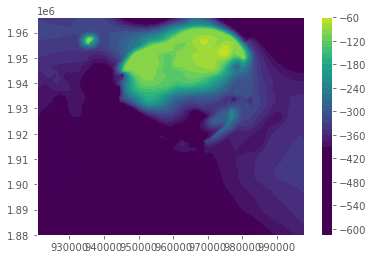

In [7]:
fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y, bed_adjusted, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_87847/897836105.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


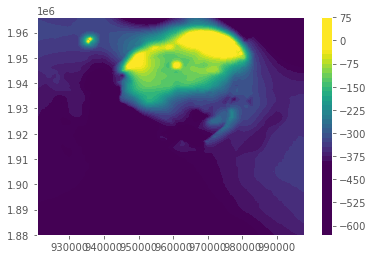

In [8]:
fig, ax = plt.subplots(1, 1)
CS = ax.contourf(X, Y, bed_original, levels=50, vmin=-400, vmax=-30)
cbar = fig.colorbar(CS)


In [9]:
# Subtract the new bed geometry from the old

bed_subtract = bed_adjusted - bed_original


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_87847/6067885.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-150, -100, -50, 0, 50, 100, 150])


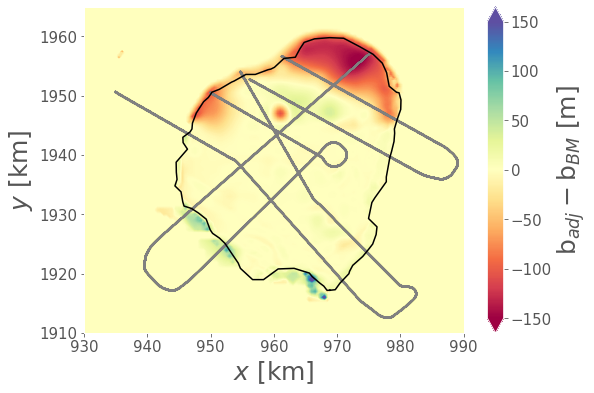

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
levels = np.linspace(-150, 150, 300)
CS = ax.contourf(X/1000, Y/1000, bed_subtract, levels=levels, vmin=-150, vmax=150, extend='both', cmap="Spectral")
ax.scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=1, color='grey')
ax.plot(hull_pts[0], hull_pts[1], color='black')

ax.set_xlabel('$x$ [km]', fontsize = 25)
ax.set_ylabel('$y$ [km]', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 990)
plt.ylim(1910, 1965)
cbar = fig.colorbar(CS, ticks=[-150, -100, -50, 0, 50, 100, 150])
cbar.set_label('b$_{adj} - $b$_{BM}$ [m]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/BedrockDifference.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_87847/1892926594.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-500, -400, -300, -200, -100, 0, 100])


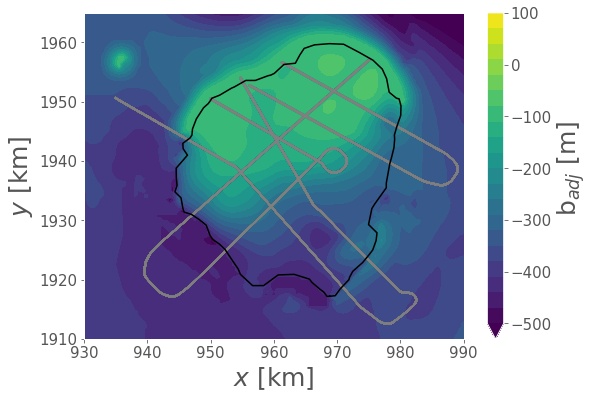

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
levels = np.linspace(-500, 100, 21)
CS = ax.contourf(X/1000, Y/1000, bed_adjusted, levels=levels, vmin=-500, vmax=100, extend='min', cmap="viridis")
ax.scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=1, color='grey')
ax.plot(hull_pts[0], hull_pts[1], color='black')

ax.set_xlabel('$x$ [km]', fontsize = 25)
ax.set_ylabel('$y$ [km]', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 990)
plt.ylim(1910, 1965)
cbar = fig.colorbar(CS, ticks=[-500, -400, -300, -200, -100, 0, 100])
cbar.set_label('b$_{adj}$ [m]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/Bedrock_adj.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_87847/845956622.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[-500, -400, -300, -200, -100, 0, 100])


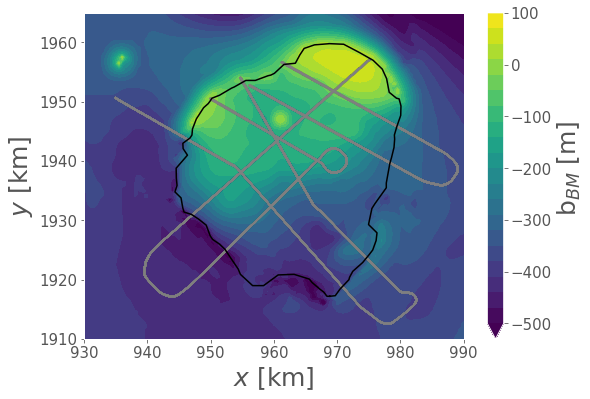

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8.5, 6))
levels = np.linspace(-500, 100, 21)
CS = ax.contourf(X/1000, Y/1000, bed_original, levels=levels, vmin=-500, vmax=100, extend='min', cmap="viridis")
ax.scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=1, color='grey')
ax.plot(hull_pts[0], hull_pts[1], color='black')

ax.set_xlabel('$x$ [km]', fontsize = 25)
ax.set_ylabel('$y$ [km]', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 990)
plt.ylim(1910, 1965)
cbar = fig.colorbar(CS, ticks=[-500, -400, -300, -200, -100, 0, 100])
cbar.set_label('b$_{BM}$ [m]', rotation=90, size=25)
cbar.ax.tick_params(labelsize=15)

fig.savefig('../Figures/Bedrock_BM.jpg', format='jpg', dpi=700, bbox_inches = "tight")
